<div style="text-align: right"> CS824 - Lab 5b (2022) </div>

# Explorations with the 'Swedish Fish Inc'

### Rasmus Bååth (adapted for Python by Christophe Carvenius, with some modifications by Crawford Revie)

These exercises are related to some examples of Bayesian Data Analysis in a series of videos by Ramsus Bååth that are referenced on the MyPlace pages. You should really watch the first 20 minutes of his video, "What is Bayes?" before you take a stab at the first example below to get a sense for what we are trying to achieve.


Swedish Fish Incorporated is the largest Swedish company delivering fish by mail order. They are now trying to get into the lucrative Danish market by selling one year salmon subscriptions. The marketing department have run a pilot study and set up a marketing approach, that we will refer to as "Method A":

**Method A:** Mail out a colorful brochure that invites people to sign up for the one year salmon subscription.

The marketing department sent out 16 brochures using Method A. Six Danes who received the brochure signed up for a salmon subscription; the marketing department now wants to know, how 'good' is Method A?


### We will use a Bayesian model to address this question. This will help us answer questions like, "what might the expected rate of sign-up be if Method A was used on a much larger number of people?"

A few things to note:

**Note 1:** The answer is not a single number but a distribution over probable rates of sign-up.

**Note 2:** We will use a simple 'generative model', which here will be the Binomial distribution. We can sample this within Python using the `np.random.binomial(n, p, size)` function. The binomial distribution simulates the process n times: The number of `successes` when performing `size` trials, where the probability of `success` is p.

**Note 3:** A commonly used prior for the unknown probability of success in a Binomial distribution is a `uniform` distribution from 0 to 1. You can draw from this distribution by running `np.random.uniform(0, 1, size = n_draws)`

**Note 4:** I have provided some code below, but it is only one of a number of ways to tackle this problem. Hopefully it can also provide a useful 'scaffold' for some of the extensions that you are asked to build in later exercises.


In [1]:
!pip install arviz

Text(0.5, 1.0, 'With 10,000 random draws')

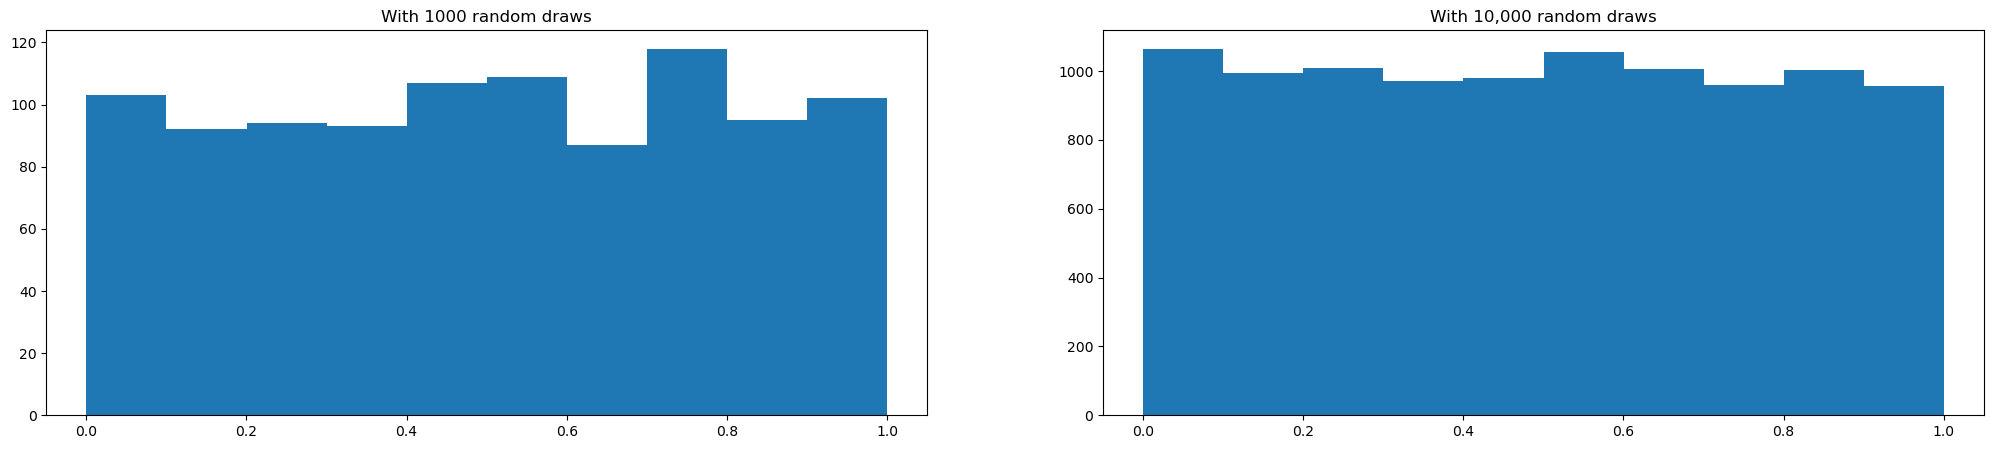

In [2]:
# Import some useful Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az


# Number of random draws from the prior   (start with 1,000 - later you can try different options)
n_draw = 1000

# Defining and drawing from the prior distribution 
prior_rate   = pd.Series(np.random.uniform(0, 1, size = n_draw)) 
prior_rate_2 = pd.Series(np.random.uniform(0, 1, size = 10000))

# It's always good to eyeball the prior to make sure it looks ok.
# prior_rate.hist()
f = plt.figure(figsize=(25,5))
axes = plt.subplot(1, 2, 1)
plt.hist(prior_rate, bins=10)
plt.title('With 1000 random draws')

axes = plt.subplot(1, 2, 2)
plt.hist(prior_rate_2, bins=10)
plt.title('With 10,000 random draws')

Text(0.5, 1.0, 'With 100,000 random draws')

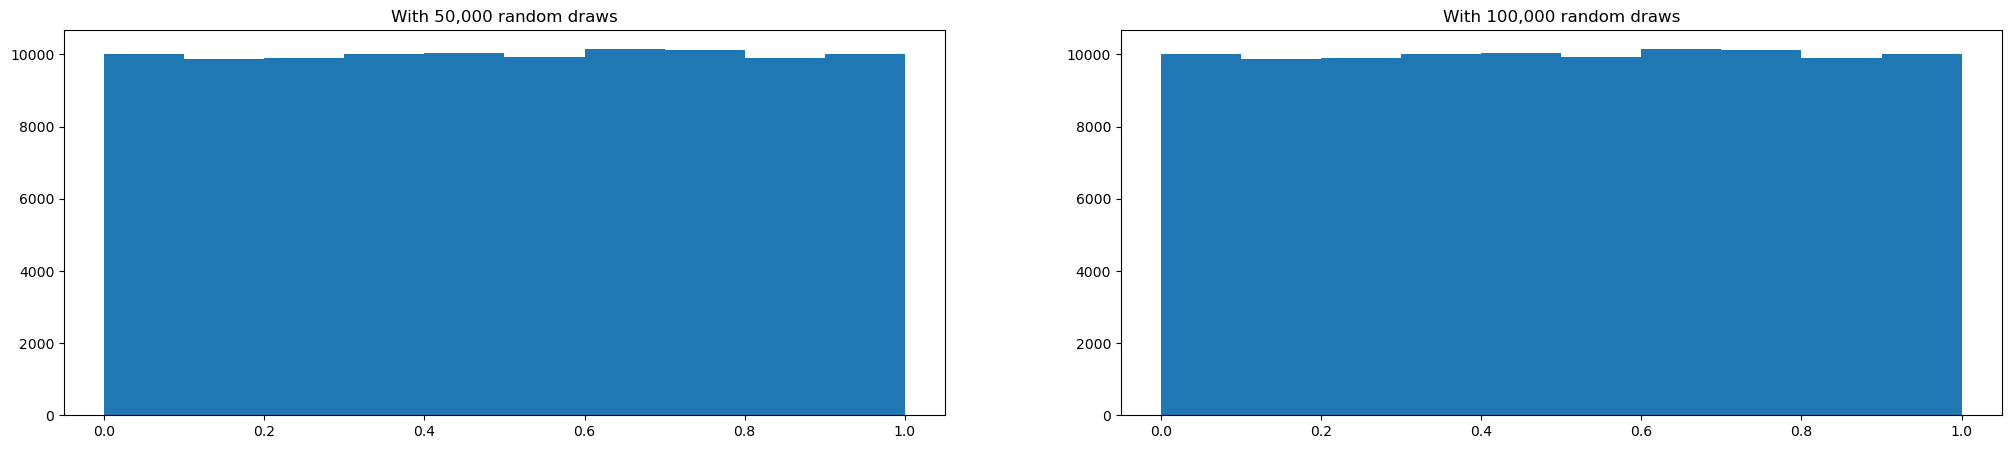

In [3]:
prior_rate_3 = pd.Series(np.random.uniform(0, 1, size = 50000))
prior_rate_4 = pd.Series(np.random.uniform(0, 1, size = 100000))

f = plt.figure(figsize=(25,5))

axes = plt.subplot(1, 2, 1)
plt.hist(prior_rate_4, bins=10)
plt.title('With 50,000 random draws')

axes = plt.subplot(1, 2, 2)
plt.hist(prior_rate_4, bins=10)
plt.title('With 100,000 random draws')

#### Running over a larger set of trials (draws)

Your histogram may look a bit 'staggered' so you may wish to set the number of draws to 10,000 and see how things look.


<AxesSubplot:>

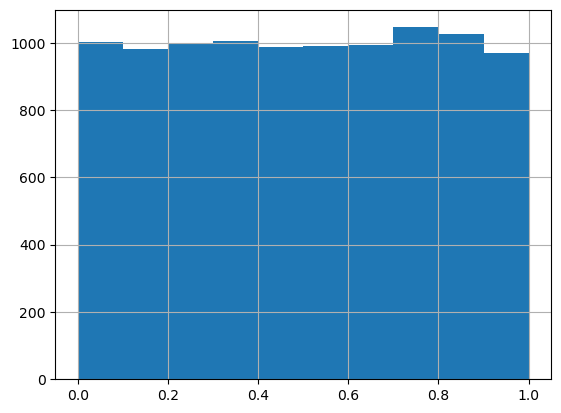

In [4]:
# Number of random draws from the prior   (
n_draw = 10000

# Defining and drawing from the prior distribution 
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draw)) 

# It's always good to eyeball the prior to make sure it looks ok.
prior_rate.hist() 

### Turning a prior into a posterior

We now have our prior distribution - an 'uninformative' uniform distribution in the first instance. We are now ready to generate a posterior distribution from this, using our 'generative' model, which in this case is a simple `Binomial` model that returns the number of `successes` (out of 16) for various p-values, as defined in our `prior`.


10000


<AxesSubplot:>

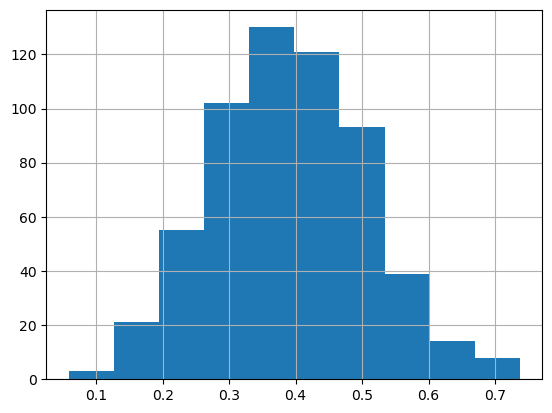

In [5]:
# Defining the generative model
def gen_model(prob):
    return(np.random.binomial(16, prob))

print(len(prior_rate))
# A list into which we will collect the outputs from our generative model
subscribers = list()

# Simulating the data (using the 'prior' set up on the last cell)
for p in prior_rate:
    subscribers.append(gen_model(p))

    
# Now we want to compare the outputs from the generative model with the data we
# actually observed.

# Observed data in our marketing exerise with 16 mailed out brochures
observed_data = 6

# Here we apply a filter so that we only end up with the draws that match our 
# data.
# There may be some new Python commands here, so you may wish to look them up 
# in the documentation.

post_rate = prior_rate[list(map(lambda x: x == observed_data, subscribers))]

# Eyeball the posterior
post_rate.hist()  


<AxesSubplot:>

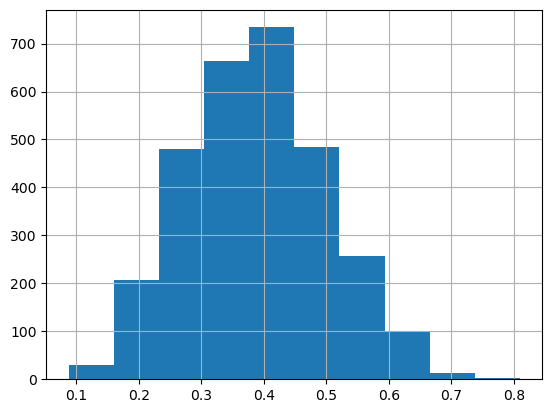

In [6]:
# A list into which we will collect the outputs from our generative model
subscribers = list()

# This would be the prior rate for Method A with 50000 samples
prior_rate_A = prior_rate_3

# Simulating the data (using the 'prior' set up on the last cell)
''' 
'prior_rate_A' is the prior distribution with 50,000 draws
'''
for p in prior_rate_A:
    subscribers.append(gen_model(p))

    
# Now we want to compare the outputs from the generative model with the data we
# actually observed.

# Observed data in our marketing exerise with 16 mailed out brochures
observed_data = 6

# Here we apply a filter so that we only end up with the draws that match our 
# data.
# There may be some new Python commands here, so you may wish to look them up 
# in the documentation.
'''
'post_rate_A' is the posterior distribution for prior distribution of
50,000 samples
'''
post_rate_A = prior_rate_A[list(map(lambda x: x == observed_data, subscribers))]

# Eyeball the posterior
post_rate_A.hist()  

Number of draws left: 2975, Posterior mean: 0.389, Posterior median: 0.387, Posterior 95% quantile interval: 0.182-0.615


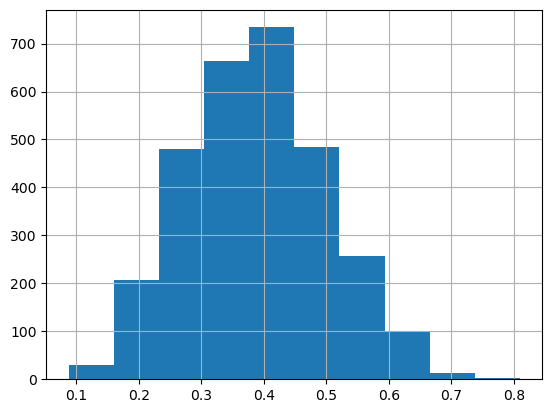

In [7]:
# After the filtering we don't have that many draws left. 
# As a rule of thumb we should aim for >1000 draws to get an more informative summary.

# So go back to the 'prior' stage and increase the number of initial draws to 10,000 or even 50,000.

# New posterior
post_rate_A.hist()

# With a larger sample we can also summarize the posterior, where a common summary would be to take the mean
# or the median posterior, as well as the 95% quantile interval.

print('Number of draws left: %d, Posterior mean: %.3f, Posterior median: %.3f, Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate_A), post_rate_A.mean(), post_rate_A.median(), post_rate_A.quantile(.025), post_rate_A.quantile(.975)))



### Question 1: What’s the probability that Method A is better than telemarketing? (SUBMIT)
----------------
So marketing have told us that the rate of sign-up would be 20% if salmon subscribers were gained by a telemarketing campaign instead (to us it’s very unclear where marketing got this very precise number from). So given the model and the data that we developed in the last question, what’s the probability that method A has a higher rate of sign-up than telemarketing?

**Hint 1:** If you have a vector of samples representing a probability distribution, which you should have from the last question, calculating the amount of probability above a certain value is done by simply *counting* the number of samples above that value and dividing by the total number of samples.

**Hint 2:** The answer to this question only requires a single line of code ;-)


In [8]:
'''
We have a vector of samples 'post_rate_3' which is representing the probability
distribution representing the distribution of 'number of sucesses' out of 16
with 50,000 samples 
'''
sum(post_rate_A > 0.2) / len(post_rate_A)

0.959327731092437

### Question 2: If Method A was used on 500 people what would be the likely number of sign-ups? (SUBMIT)
--------------

**Hint 1:** The answer is *not* a single number but a *distribution* over the probable number of sign-ups.

**Hint 2:** As before, the Binomial distribution is a good candidate for how many people who might sign up out of the 500 possible.

**Hint 3:** Make sure you don’t “throw away” uncertainty, for example by using a summary of the posterior distribution calculated in the first part of the exercise. Try to find a way to use the full original posterior sample!

**Hint 4:** The general pattern when calculating “derivatives” of posterior samples is to go through the values one-by-one, and perform a transformation (say, plugging in the value in a Binomial distribution), and collect the new values in a vector.


In [9]:
signups = pd.Series([np.random.binomial(n = 500, p = p) for p in post_rate_A])

Number of Signups Posterior 95% quantile interval: 153.000-308.000


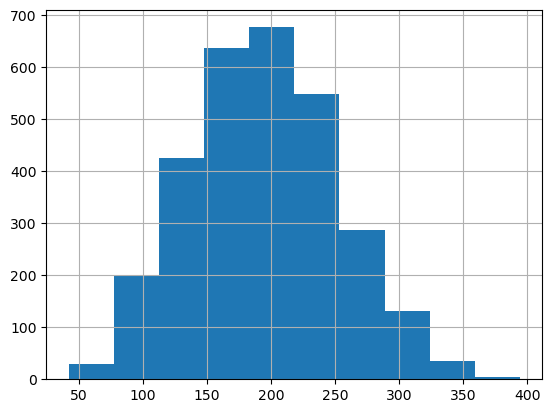

In [10]:
signups.hist()

print('Number of Signups Posterior 95%% quantile interval: %.3f-%.3f' % 
      tuple(signups.quantile([0.25, 0.975]).values))

# Based on the below graph, we can say that there can be anywhere between 150 
# and 310 sign-ups out of the total 500 people.

### Question 3, In his second video Rasmus looks at comparing Method A and Method B, and also introduces a more 'informed' prior (based on the CEO's views). Extend your example to deal with these extensions. (SUBMIT with some comments.)
--------------

**Comment 1:** Reflect on the Method A versus Method B outcomes.

**Comment 2:** You don't have to chose the `Beta` distribution that Rasmus chose for his CEO's 'informed' prior, but if you chose an alternative distribution you should reflect on how this selection has altered your output.


<AxesSubplot:>

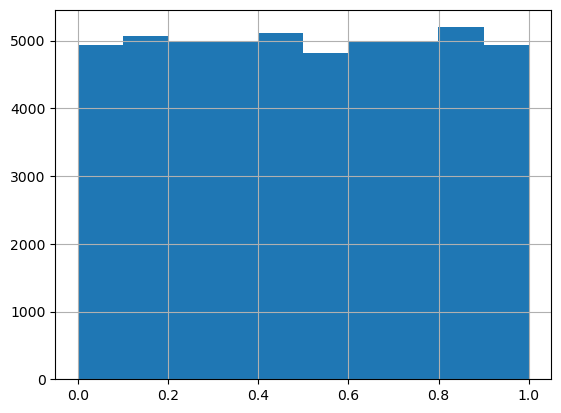

In [11]:
# Number of random draws from the prior
n_draw = 50000

# Defining and drawing from the prior distribution for Method_B 
prior_rate_B = pd.Series(np.random.uniform(0, 1, size = n_draw)) 

# It's always good to eyeball the prior to make sure it looks ok.
prior_rate_B.hist()

<AxesSubplot:>

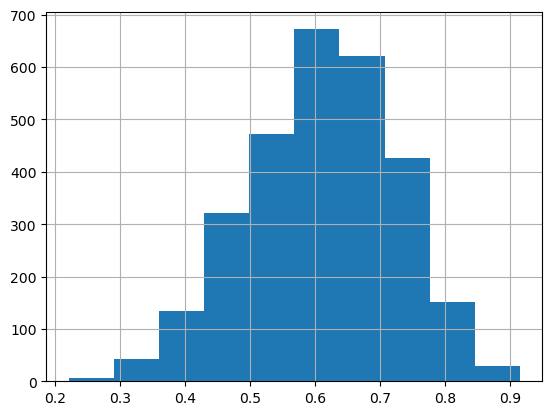

In [12]:
#Method B: Mail out brochures and a sample of frozen salmon that invites 
#          people to one year salmon subscription.

# A list into which we will collect the outputs from our generative model
# for method B
subscribers_B = list()

# Simulating the data (using the 'prior' set up on the last cell)
for p in prior_rate_B:
    subscribers_B.append(gen_model(p))
    
# Now we want to compare the outputs from the generative model with the data we 
# actually observed.

# Observed data in our marketing exerise with 16 mailed out brochures
observed_data_B = 10

# Here we apply a filter so that we only end up with the draws that match our 
# data.
# There may be some new Python commands here, so you may wish to look them up 
# in the documentation.

post_rate_B = prior_rate_B[list(map(
                                lambda x: x == observed_data_B, subscribers_B))]

# Eyeball the posterior
post_rate_B.hist()

Number of draws left: 2880, Posterior mean: 0.610, Posterior median: 0.616, Posterior 95% quantile interval: 0.383-0.813


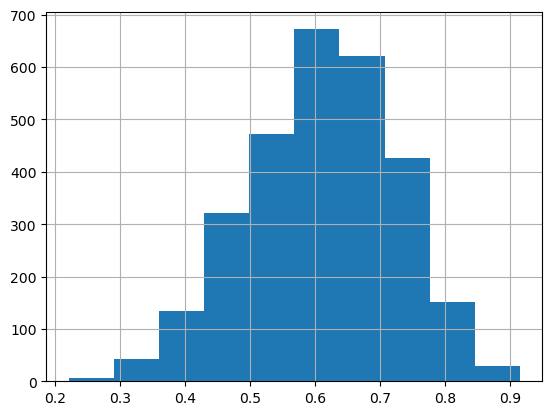

In [13]:
# New posterior
post_rate_B.hist()

print('Number of draws left: %d, Posterior mean: %.3f, Posterior median: %.3f, Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate_B), post_rate_B.mean(), post_rate_B.median(), post_rate_B.quantile(.025), post_rate_B.quantile(.975)))

In [14]:
'''
From the distribution of the rate of sign up for Method A, it pretty much seems
that the rate of sign up is somewhere between 20% and 60% with it most likely 
being somewhere around 35%
As for Method B, just looking at the posterior distribution it seems there is 
some evidence that Method B would result in more sign ups as the bulk of the 
distribution is between 40% and 80% with the sign up rate being most likely 
around 60%.
'''

'\nFrom the distribution of the rate of sign up for Method A, it pretty much seems\nthat the rate of sign up is somewhere between 20% and 60% with it most likely \nbeing somewhere around 35%\nAs for Method B, just looking at the posterior distribution it seems there is \nsome evidence that Method B would result in more sign ups as the bulk of the \ndistribution is between 40% and 80% with the sign up rate being most likely \naround 60%.\n'

In [15]:
rate_diff = post_rate_B - post_rate_A

In [16]:
post_rate_diff = rate_diff.dropna()

In [17]:
sum(post_rate_diff > 0) / len(post_rate_diff)

#There is a 92% probability rate B is better than rate A

0.8975903614457831

<AxesSubplot:>

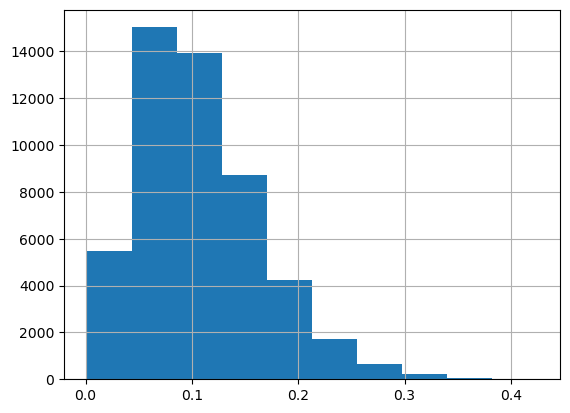

In [18]:
# Using the 'Beta' distribution
n_draw = 50000

# Defining and drawing from the prior distribution 
inf_prior_rate = pd.Series(np.random.beta(3, 25, size = n_draw)) 

# It's always good to eyeball the prior to make sure it looks ok.
inf_prior_rate.hist()

Number of draws left: 737, Posterior mean: 0.204, Posterior median: 0.200, Posterior 95% quantile interval: 0.103-0.336


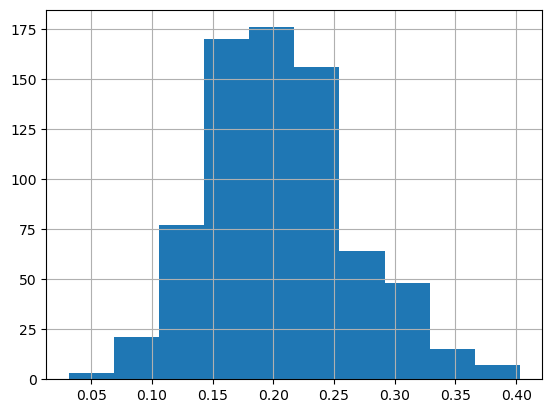

In [19]:
# Defining the generative model
def generative_model(prob):
    return(np.random.binomial(16, prob))


# A list into which we will collect the outputs from our generative model
subs = list()

# Simulating the data (using the 'prior' set up on the last cell)
for p in inf_prior_rate:
    subs.append(generative_model(p))

    
# Now we want to compare the outputs from the generative model with the data we actually observed.

# Observed data in our marketing exerise with 16 mailed out brochures
obs_data = 6

# Here we apply a filter so that we only end up with the draws that match our data.
# There may be some new Python commands here, so you may wish to look them up in the documentation.

inf_post_rate = inf_prior_rate[list(map(lambda x: x == obs_data, subs))]

# Eyeball the posterior
inf_post_rate.hist() 

print('Number of draws left: %d, Posterior mean: %.3f, Posterior median: %.3f, Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(inf_post_rate), inf_post_rate.mean(), inf_post_rate.median(), inf_post_rate.quantile(.025), inf_post_rate.quantile(.975)))

In [20]:
'''
Looking at the distribution above using the informative prior it seems that 
after having used the info from the CEO and the information from the data it 
is most probable that the rate of sign up is between 10% and 30%

If we had more data the information in the prior would have less influence,
with enough data the prior wouldn't matter at all.
Similarly, if we had less data the posterior would look more like the prior 
and if we had no data at all the posterior would be the prior.
'''

"\nLooking at the distribution above using the informative prior it seems that \nafter having used the info from the CEO and the information from the data it \nis most probable that the rate of sign up is between 10% and 30%\n\nIf we had more data the information in the prior would have less influence,\nwith enough data the prior wouldn't matter at all.\nSimilarly, if we had less data the posterior would look more like the prior \nand if we had no data at all the posterior would be the prior.\n"

### Question 4. Again in the second video Rasmus looks at how the posterior distributions for Method A and Method B can be directly used to compare costs and profits for each approach. Explore this - you can use whatever costs you feel might be interesting - and provide some reflections. (SUBMIT)
--------------


In [21]:
#Calculating profit using method A 

# 'post_rate_A' is the rate of sign up
# Lets take 1000 per sign up
# 30 is the cost of sending the brochure
profit_A = (post_rate_A * 1000) - 30
#profit_A
max(profit_A)

779.5665458769444

In [22]:
#Calculating profit using method B

# 'post_rate_B' is the rate of sign up
# Lets take 1000 per sign up
# 300 is the cost of sending the brochure + sample salmon
profit_B = (post_rate_B * 1000) - 300
#profit_B
max(profit_B)

614.3383864435511

<AxesSubplot:>

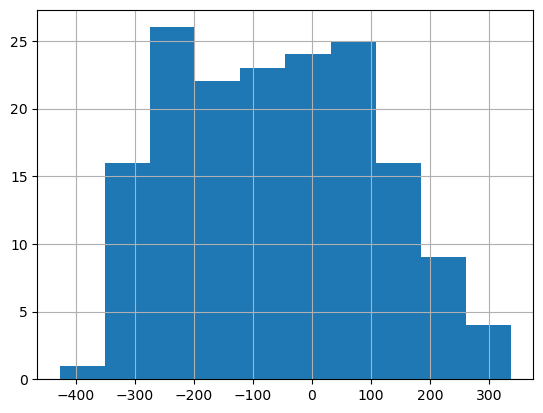

In [23]:
profit_diff = profit_B - profit_A
profit_diff.hist()

In [24]:
'''
From the above distribution we can see that there is much uncertainty regarding 
which method would give us the highest profit.
This decision analysis tells us that we should go for Method A even if Method B 
has a higher rate of sign up.
'''

'\nFrom the above distribution we can see that there is much uncertainty regarding \nwhich method would give us the highest profit.\nThis decision analysis tells us that we should go for Method A even if Method B \nhas a higher rate of sign up.\n'